In [67]:
import os, sys
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy import units
from tqdm import tqdm_notebook
from astropy.time import Time
from lightkurve.lightcurve import LightCurve
from scipy.interpolate import interp1d

#from costools import timefilter, splittag
#import calcos

%load_ext autoreload
%autoreload 2
sys.path.append('/Users/belugawhale/Documents/GitHub/cos_flares/src')
from cos_reduction import *
from utils import *

parula = np.load('/Users/belugawhale/parula_colors.npy')

## PROPOSAL ID 16164
plt.rcParams['font.size']=24

paths = ['LEBW02010', 'LEBW03010', 'LEBW04010', 'LEBW05010', 'LEBW54010']

rootname = [['lebw02kiq', 'lebw02kkq', 'lebw02kmq', 'lebw02koq'],
            ['lebw03aaq', 'lebw03aoq', 'lebw03b2q', 'lebw03c4q', 'lebw03cjq'],
            ['lebw04uyq', 'lebw04v1q', 'lebw04vnq', 'lebw04vpq', 'lebw04vrq'],
            ['lebw05q0q', 'lebw05q4q', 'lebw05qcq', 'lebw05qeq', 'lebw05qgq'],
            ['lebw54g0q', 'lebw54gbq', 'lebw54gnq', 'lebw54grq', 'lebw54gtq']]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
cr = cosReduce(rootname=rootname[0], 
               input_path='/Users/belugawhale/Documents/HST_COS/V1298_Tau/'+paths[0])

In [ ]:
for j,p in enumerate(paths):
    for i, rn in enumerate(rootname[j]):
        try:
            cr = cosReduce(rootname=[rn], 
                           input_path='/Users/belugawhale/Documents/HST_COS/V1298_Tau/'+p)

            cr.split_corrtag(output_path='/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/'+p, increment=30)
        except:
            print(rootname[j][i])

In [ ]:
cr.check_ref_files(path='/Users/belugawhale/Documents/HST_COS/lref/lref')

In [39]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/belugawhale/Documents/GitHub/cos_flares/src')
from cos_reduction import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
for p in paths:

    path = '/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/' + p + '/'
    files = np.sort([os.path.join(path, i) for i in os.listdir(path)])

    for i in range(len(files)):
        if len(files[i]) < 94:
            diff = 94 - len(files[i])
            split = files[i].split('_')
            zeros = np.zeros(diff)
            newsplit = ''.join(str(int(e)) for e in zeros) + split[-3]
            split[-3] = newsplit
            newname = '_'.join(e for e in split)
            os.rename(files[i], newname)

In [41]:
for p in paths:
    path = '/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/' + p + '/'
    files = np.sort([os.path.join(path, fn) for fn in os.listdir(path)])
    cr.splittag_path = '/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/'+p
    cr.reduce_data(output_path='/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced',
                   component='b', split_files=files, save_space=True)

  0%|                                                                                                               | 0/388 [00:00<?, ?it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
ERROR:  output files already exist:
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_corrtag_a.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_flt_a.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_x1d_a.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_corrtag_b.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_flt_b.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_x1d_b.fits
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
ERROR:  output files already exist:
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_corrtag_a.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vp

 34%|█████████████████████████████████▍                                                                 | 131/388 [00:00<00:00, 1127.31it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 34%|█████████████████████████████████▍                                                                 | 131/388 [00:18<00:00, 1127.31it/s]

 34%|██████████████████████████████████▎                                                                  | 132/388 [00:19<00:53,  4.79it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 35%|██████████████████████████████████▉                                                                  | 134/388 [00:38<02:05,  2.03it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 164, -6
Shifting to 166, -6
Shifting to 167, -6
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.0

 35%|███████████████████████████████████▍                                                                 | 136/388 [00:57<03:37,  1.16it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 36%|███████████████████████████████████▉                                                                 | 138/388 [01:16<05:35,  1.34s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Sh

 36%|████████████████████████████████████▍                                                                | 140/388 [01:36<08:04,  1.95s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 37%|████████████████████████████████████▉                                                                | 142/388 [01:55<10:54,  2.66s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 37%|█████████████████████████████████████▍                                                               | 144/388 [02:15<14:19,  3.52s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 38%|██████████████████████████████████████                                                               | 146/388 [02:34<17:51,  4.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 38%|██████████████████████████████████████▌                                                              | 148/388 [02:53<21:05,  5.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 164, -6
Shifting to 166, -6
Shifting to 167, -6
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.0

 39%|███████████████████████████████████████                                                              | 150/388 [03:11<24:05,  6.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 39%|███████████████████████████████████████▌                                                             | 152/388 [03:30<26:39,  6.78s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 40%|████████████████████████████████████████                                                             | 154/388 [03:49<29:05,  7.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Sh

 40%|████████████████████████████████████████▌                                                            | 156/388 [04:08<30:46,  7.96s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 41%|█████████████████████████████████████████▏                                                           | 158/388 [04:28<32:27,  8.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 164, -6
Shifting to 166, -6
Shifting to 167, -6
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.0

 41%|█████████████████████████████████████████▋                                                           | 160/388 [04:47<33:25,  8.79s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 42%|██████████████████████████████████████████▏                                                          | 162/388 [05:06<34:08,  9.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 164, -6
Shifting to 166, -6
Shifting to 167, -6
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.0

 42%|██████████████████████████████████████████▋                                                          | 164/388 [05:26<34:26,  9.23s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 43%|███████████████████████████████████████████▏                                                         | 166/388 [05:45<34:22,  9.29s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Sh

 43%|███████████████████████████████████████████▋                                                         | 168/388 [06:04<34:21,  9.37s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 44%|████████████████████████████████████████████▎                                                        | 170/388 [06:23<34:21,  9.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 44%|████████████████████████████████████████████▊                                                        | 172/388 [06:42<34:18,  9.53s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 45%|█████████████████████████████████████████████▎                                                       | 174/388 [07:02<34:08,  9.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 45%|█████████████████████████████████████████████▊                                                       | 176/388 [07:21<33:40,  9.53s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 46%|██████████████████████████████████████████████▎                                                      | 178/388 [07:39<33:09,  9.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 164, -6
Shifting to 166, -6
Shifting to 167, -6
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.0

 46%|██████████████████████████████████████████████▊                                                      | 180/388 [07:58<32:51,  9.48s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 47%|███████████████████████████████████████████████▍                                                     | 182/388 [08:18<32:54,  9.58s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 47%|███████████████████████████████████████████████▉                                                     | 184/388 [08:37<32:36,  9.59s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 164, -6
Shifting to 166, -6
Shifting to 167, -6
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.0

 48%|████████████████████████████████████████████████▍                                                    | 186/388 [08:56<32:05,  9.53s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 164, -6
Shifting to 166, -6
Shifting to 167, -6
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.0

 48%|████████████████████████████████████████████████▉                                                    | 188/388 [09:15<31:33,  9.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 49%|█████████████████████████████████████████████████▍                                                   | 190/388 [09:34<31:12,  9.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 49%|█████████████████████████████████████████████████▉                                                   | 192/388 [09:52<30:53,  9.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 50%|██████████████████████████████████████████████████▌                                                  | 194/388 [10:11<30:35,  9.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 51%|███████████████████████████████████████████████████                                                  | 196/388 [10:30<30:04,  9.40s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 51%|███████████████████████████████████████████████████▌                                                 | 198/388 [10:48<29:39,  9.37s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 164, -6
Shifting to 166, -6
Shifting to 167, -6
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.0

 52%|████████████████████████████████████████████████████                                                 | 200/388 [11:08<29:35,  9.44s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 52%|████████████████████████████████████████████████████▌                                                | 202/388 [11:27<29:16,  9.44s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 53%|█████████████████████████████████████████████████████                                                | 204/388 [11:46<29:13,  9.53s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 53%|█████████████████████████████████████████████████████▌                                               | 206/388 [12:06<29:22,  9.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 54%|██████████████████████████████████████████████████████▏                                              | 208/388 [12:26<29:16,  9.76s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 164, -6
Shifting to 166, -6
Shifting to 167, -6
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.0

 54%|██████████████████████████████████████████████████████▋                                              | 210/388 [12:49<30:16, 10.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 164, -6
Shifting to 166, -6
Shifting to 167, -6
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.0

 55%|███████████████████████████████████████████████████████▏                                             | 212/388 [13:12<31:19, 10.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 55%|███████████████████████████████████████████████████████▋                                             | 214/388 [13:36<32:03, 11.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shif

 56%|████████████████████████████████████████████████████████▏                                            | 216/388 [13:57<31:20, 10.93s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shif

 56%|████████████████████████████████████████████████████████▋                                            | 218/388 [14:18<30:25, 10.74s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 57%|█████████████████████████████████████████████████████████▎                                           | 220/388 [14:40<30:17, 10.82s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 57%|█████████████████████████████████████████████████████████▊                                           | 222/388 [15:02<30:11, 10.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 58%|██████████████████████████████████████████████████████████▎                                          | 224/388 [15:25<30:19, 11.10s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 58%|██████████████████████████████████████████████████████████▊                                          | 226/388 [15:46<29:13, 10.83s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Shifting to 163, -1
Shifting to 165, -1
Shifting to 166, -1
Shifting to 162, 0
Shi

 59%|███████████████████████████████████████████████████████████▎                                         | 228/388 [16:06<28:21, 10.63s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Shifting to 163, -1
Shifting to 165, -1
Shifting to 166, -1
Shifting to 162, 0
Shi

 59%|███████████████████████████████████████████████████████████▊                                         | 230/388 [16:26<27:28, 10.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 60%|████████████████████████████████████████████████████████████▍                                        | 232/388 [16:47<27:05, 10.42s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 60%|████████████████████████████████████████████████████████████▉                                        | 234/388 [17:09<27:16, 10.63s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 61%|█████████████████████████████████████████████████████████████▍                                       | 236/388 [17:28<26:11, 10.34s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 61%|█████████████████████████████████████████████████████████████▉                                       | 238/388 [17:48<25:42, 10.28s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 166, -6
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Sh

 62%|██████████████████████████████████████████████████████████████▍                                      | 240/388 [18:09<25:26, 10.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 62%|██████████████████████████████████████████████████████████████▉                                      | 242/388 [18:30<25:14, 10.38s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 63%|███████████████████████████████████████████████████████████████▌                                     | 244/388 [18:51<24:59, 10.41s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 63%|████████████████████████████████████████████████████████████████                                     | 246/388 [19:13<24:47, 10.48s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 64%|████████████████████████████████████████████████████████████████▌                                    | 248/388 [19:33<24:20, 10.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 64%|█████████████████████████████████████████████████████████████████                                    | 250/388 [19:54<23:55, 10.40s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 65%|█████████████████████████████████████████████████████████████████▌                                   | 252/388 [20:14<23:18, 10.28s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 65%|██████████████████████████████████████████████████████████████████                                   | 254/388 [20:34<22:49, 10.22s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 66%|██████████████████████████████████████████████████████████████████▋                                  | 256/388 [20:55<22:30, 10.23s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 66%|███████████████████████████████████████████████████████████████████▏                                 | 258/388 [21:14<21:59, 10.15s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 67%|███████████████████████████████████████████████████████████████████▋                                 | 260/388 [21:34<21:32, 10.10s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 68%|████████████████████████████████████████████████████████████████████▏                                | 262/388 [21:55<21:12, 10.10s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 68%|████████████████████████████████████████████████████████████████████▋                                | 264/388 [22:15<20:57, 10.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

 69%|█████████████████████████████████████████████████████████████████████▏                               | 266/388 [22:36<20:44, 10.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -6
Shifting to 166, -6
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651541
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Sh

 69%|█████████████████████████████████████████████████████████████████████▊                               | 268/388 [22:56<20:26, 10.22s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 70%|██████████████████████████████████████████████████████████████████████▎                              | 270/388 [23:17<20:12, 10.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 70%|██████████████████████████████████████████████████████████████████████▊                              | 272/388 [23:38<20:01, 10.35s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 71%|███████████████████████████████████████████████████████████████████████▎                             | 274/388 [24:00<20:04, 10.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 71%|███████████████████████████████████████████████████████████████████████▊                             | 276/388 [24:21<19:35, 10.50s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 72%|████████████████████████████████████████████████████████████████████████▎                            | 278/388 [24:42<19:10, 10.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 72%|████████████████████████████████████████████████████████████████████████▉                            | 280/388 [25:02<18:46, 10.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 73%|█████████████████████████████████████████████████████████████████████████▍                           | 282/388 [25:24<18:30, 10.48s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 73%|█████████████████████████████████████████████████████████████████████████▉                           | 284/388 [25:45<18:10, 10.49s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 74%|██████████████████████████████████████████████████████████████████████████▍                          | 286/388 [26:05<17:43, 10.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 74%|██████████████████████████████████████████████████████████████████████████▉                          | 288/388 [26:26<17:21, 10.42s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 75%|███████████████████████████████████████████████████████████████████████████▍                         | 290/388 [26:46<16:55, 10.37s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 75%|████████████████████████████████████████████████████████████████████████████                         | 292/388 [27:07<16:32, 10.34s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 76%|████████████████████████████████████████████████████████████████████████████▌                        | 294/388 [27:28<16:10, 10.32s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 76%|█████████████████████████████████████████████████████████████████████████████                        | 296/388 [27:48<15:45, 10.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 77%|█████████████████████████████████████████████████████████████████████████████▌                       | 298/388 [28:08<15:22, 10.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 77%|██████████████████████████████████████████████████████████████████████████████                       | 300/388 [28:30<15:11, 10.36s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 78%|██████████████████████████████████████████████████████████████████████████████▌                      | 302/388 [28:50<14:46, 10.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 78%|███████████████████████████████████████████████████████████████████████████████▏                     | 304/388 [29:10<14:24, 10.29s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 79%|███████████████████████████████████████████████████████████████████████████████▋                     | 306/388 [29:30<13:54, 10.18s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 79%|████████████████████████████████████████████████████████████████████████████████▏                    | 308/388 [29:50<13:21, 10.01s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 80%|████████████████████████████████████████████████████████████████████████████████▋                    | 310/388 [30:10<13:04, 10.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 80%|█████████████████████████████████████████████████████████████████████████████████▏                   | 312/388 [30:29<12:38,  9.98s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 81%|█████████████████████████████████████████████████████████████████████████████████▋                   | 314/388 [30:50<12:21, 10.02s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 81%|██████████████████████████████████████████████████████████████████████████████████▎                  | 316/388 [31:09<11:53,  9.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 82%|██████████████████████████████████████████████████████████████████████████████████▊                  | 318/388 [31:28<11:22,  9.75s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 82%|███████████████████████████████████████████████████████████████████████████████████▎                 | 320/388 [31:47<10:56,  9.65s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 83%|███████████████████████████████████████████████████████████████████████████████████▊                 | 322/388 [32:06<10:34,  9.61s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 84%|████████████████████████████████████████████████████████████████████████████████████▎                | 324/388 [32:25<10:18,  9.67s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 84%|████████████████████████████████████████████████████████████████████████████████████▊                | 326/388 [32:44<09:55,  9.61s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 85%|█████████████████████████████████████████████████████████████████████████████████████▍               | 328/388 [33:03<09:30,  9.52s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 85%|█████████████████████████████████████████████████████████████████████████████████████▉               | 330/388 [33:22<09:14,  9.56s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 86%|██████████████████████████████████████████████████████████████████████████████████████▍              | 332/388 [33:41<08:51,  9.50s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 86%|██████████████████████████████████████████████████████████████████████████████████████▉              | 334/388 [34:00<08:31,  9.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 87%|███████████████████████████████████████████████████████████████████████████████████████▍             | 336/388 [34:18<08:09,  9.41s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 87%|███████████████████████████████████████████████████████████████████████████████████████▉             | 338/388 [34:36<07:46,  9.34s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 88%|████████████████████████████████████████████████████████████████████████████████████████▌            | 340/388 [34:55<07:26,  9.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 164, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 88%|█████████████████████████████████████████████████████████████████████████████████████████            | 342/388 [35:04<06:01,  7.86s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 167, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 166, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 167, -5
Sh

 88%|█████████████████████████████████████████████████████████████████████████████████████████            | 342/388 [35:20<06:01,  7.86s/it]

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 89%|█████████████████████████████████████████████████████████████████████████████████████████▌           | 344/388 [35:22<06:00,  8.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 89%|█████████████████████████████████████████████████████████████████████████████████████████▊           | 345/388 [35:31<05:59,  8.37s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1


 89%|██████████████████████████████████████████████████████████████████████████████████████████▎          | 347/388 [35:50<05:57,  8.72s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 90%|██████████████████████████████████████████████████████████████████████████████████████████▌          | 348/388 [35:59<05:52,  8.81s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members


 90%|██████████████████████████████████████████████████████████████████████████████████████████▌          | 348/388 [36:10<05:52,  8.81s/it]

Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 90%|███████████████████████████████████████████████████████████████████████████████████████████          | 350/388 [36:18<05:46,  9.11s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 90%|███████████████████████████████████████████████████████████████████████████████████████████▎         | 351/388 [36:28<05:39,  9.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1


 90%|███████████████████████████████████████████████████████████████████████████████████████████▎         | 351/388 [36:40<05:39,  9.16s/it]

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 91%|███████████████████████████████████████████████████████████████████████████████████████████▉         | 353/388 [36:46<05:21,  9.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 91%|████████████████████████████████████████████████████████████████████████████████████████████▏        | 354/388 [36:55<05:12,  9.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1


 91%|████████████████████████████████████████████████████████████████████████████████████████████▏        | 354/388 [37:10<05:12,  9.20s/it]

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 92%|████████████████████████████████████████████████████████████████████████████████████████████▋        | 356/388 [37:14<04:55,  9.24s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 92%|████████████████████████████████████████████████████████████████████████████████████████████▉        | 357/388 [37:23<04:45,  9.22s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1


 92%|████████████████████████████████████████████████████████████████████████████████████████████▉        | 357/388 [37:40<04:45,  9.22s/it]

Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 93%|█████████████████████████████████████████████████████████████████████████████████████████████▍       | 359/388 [37:42<04:27,  9.22s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 93%|█████████████████████████████████████████████████████████████████████████████████████████████▋       | 360/388 [37:51<04:18,  9.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1


 93%|█████████████████████████████████████████████████████████████████████████████████████████████▋       | 360/388 [38:10<04:18,  9.25s/it]

Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 94%|██████████████████████████████████████████████████████████████████████████████████████████████▍      | 363/388 [38:19<03:51,  9.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 94%|██████████████████████████████████████████████████████████████████████████████████████████████▊      | 364/388 [38:28<03:42,  9.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1


 94%|██████████████████████████████████████████████████████████████████████████████████████████████▊      | 364/388 [38:40<03:42,  9.27s/it]

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 94%|███████████████████████████████████████████████████████████████████████████████████████████████▎     | 366/388 [38:47<03:24,  9.28s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 95%|███████████████████████████████████████████████████████████████████████████████████████████████▌     | 367/388 [38:56<03:14,  9.26s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1


 95%|███████████████████████████████████████████████████████████████████████████████████████████████▌     | 367/388 [39:10<03:14,  9.26s/it]

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 95%|████████████████████████████████████████████████████████████████████████████████████████████████     | 369/388 [39:14<02:55,  9.24s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 95%|████████████████████████████████████████████████████████████████████████████████████████████████▎    | 370/388 [39:24<02:46,  9.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 96%|████████████████████████████████████████████████████████████████████████████████████████████████▌    | 371/388 [39:33<02:37,  9.26s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 96%|████████████████████████████████████████████████████████████████████████████████████████████████▊    | 372/388 [39:42<02:28,  9.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████    | 373/388 [39:51<02:19,  9.28s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████▎   | 374/388 [40:01<02:09,  9.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████▌   | 375/388 [40:10<02:00,  9.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████▉   | 376/388 [40:19<01:51,  9.29s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████▏  | 377/388 [40:29<01:43,  9.38s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████▍  | 378/388 [40:38<01:33,  9.35s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████▋  | 379/388 [40:47<01:23,  9.32s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████▉  | 380/388 [40:57<01:14,  9.32s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████▏ | 381/388 [41:06<01:05,  9.29s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████▍ | 382/388 [41:15<00:55,  9.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████▋ | 383/388 [41:25<00:46,  9.28s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████▉ | 384/388 [41:34<00:37,  9.34s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████▏| 385/388 [41:44<00:28,  9.51s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████▍| 386/388 [41:54<00:19,  9.65s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████▋| 387/388 [42:04<00:09,  9.90s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -5
Shifting to 166, -5
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652200
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


  0%|                                                                                                                                 | 0/808 [00:00<?, ?it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652168
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 

 56%|██████████████████████████████████████████████████████████████████▏                                                    | 449/808 [00:19<00:15, 23.32it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 56%|██████████████████████████████████████████████████████████████████▏                                                    | 449/808 [00:36<00:15, 23.32it/s]

 59%|██████████████████████████████████████████████████████████████████████▌                                                | 479/808 [00:38<00:30, 10.66it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 60%|██████████████████████████████████████████████████████████████████████▊                                                | 481/808 [00:56<00:55,  5.92it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 60%|███████████████████████████████████████████████████████████████████████▏                                               | 483/808 [01:15<01:30,  3.59it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 60%|███████████████████████████████████████████████████████████████████████▍                                               | 485/808 [01:35<02:20,  2.30it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 60%|███████████████████████████████████████████████████████████████████████▋                                               | 487/808 [01:54<03:26,  1.55it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 61%|████████████████████████████████████████████████████████████████████████                                               | 489/808 [02:13<04:53,  1.09it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 61%|████████████████████████████████████████████████████████████████████████▎                                              | 491/808 [02:32<06:47,  1.29s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 61%|████████████████████████████████████████████████████████████████████████▌                                              | 493/808 [02:51<09:15,  1.76s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 61%|████████████████████████████████████████████████████████████████████████▉                                              | 495/808 [03:10<12:14,  2.35s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 62%|█████████████████████████████████████████████████████████████████████████▏                                             | 497/808 [03:29<15:49,  3.05s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 62%|█████████████████████████████████████████████████████████████████████████▍                                             | 499/808 [03:48<20:04,  3.90s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 62%|█████████████████████████████████████████████████████████████████████████▊                                             | 501/808 [04:07<24:04,  4.70s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 62%|██████████████████████████████████████████████████████████████████████████                                             | 503/808 [04:25<27:51,  5.48s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 62%|██████████████████████████████████████████████████████████████████████████▍                                            | 505/808 [04:44<31:28,  6.23s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 63%|██████████████████████████████████████████████████████████████████████████▋                                            | 507/808 [05:02<34:34,  6.89s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 63%|██████████████████████████████████████████████████████████████████████████▉                                            | 509/808 [05:21<37:15,  7.48s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 63%|███████████████████████████████████████████████████████████████████████████▎                                           | 511/808 [05:39<39:12,  7.92s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 63%|███████████████████████████████████████████████████████████████████████████▌                                           | 513/808 [05:58<40:51,  8.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 64%|███████████████████████████████████████████████████████████████████████████▊                                           | 515/808 [06:16<41:51,  8.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 64%|████████████████████████████████████████████████████████████████████████████▏                                          | 517/808 [06:35<42:26,  8.75s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 64%|████████████████████████████████████████████████████████████████████████████▍                                          | 519/808 [06:53<42:58,  8.92s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 64%|████████████████████████████████████████████████████████████████████████████▋                                          | 521/808 [07:12<43:02,  9.00s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 65%|█████████████████████████████████████████████████████████████████████████████                                          | 523/808 [07:30<43:06,  9.08s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 65%|█████████████████████████████████████████████████████████████████████████████▎                                         | 525/808 [07:49<43:12,  9.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 65%|█████████████████████████████████████████████████████████████████████████████▌                                         | 527/808 [08:07<42:57,  9.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 65%|█████████████████████████████████████████████████████████████████████████████▉                                         | 529/808 [08:26<42:42,  9.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 66%|██████████████████████████████████████████████████████████████████████████████▏                                        | 531/808 [08:44<42:22,  9.18s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 66%|██████████████████████████████████████████████████████████████████████████████▍                                        | 533/808 [09:03<42:06,  9.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 66%|██████████████████████████████████████████████████████████████████████████████▊                                        | 535/808 [09:21<41:46,  9.18s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 66%|███████████████████████████████████████████████████████████████████████████████                                        | 537/808 [09:40<41:49,  9.26s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 67%|███████████████████████████████████████████████████████████████████████████████▍                                       | 539/808 [10:01<43:04,  9.61s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 67%|███████████████████████████████████████████████████████████████████████████████▋                                       | 541/808 [10:20<43:03,  9.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 67%|███████████████████████████████████████████████████████████████████████████████▉                                       | 543/808 [10:39<42:09,  9.54s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 67%|████████████████████████████████████████████████████████████████████████████████▎                                      | 545/808 [10:57<41:29,  9.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 68%|████████████████████████████████████████████████████████████████████████████████▌                                      | 547/808 [11:16<40:50,  9.39s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 68%|████████████████████████████████████████████████████████████████████████████████▊                                      | 549/808 [11:34<40:16,  9.33s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 68%|█████████████████████████████████████████████████████████████████████████████████▏                                     | 551/808 [11:53<39:50,  9.30s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 68%|█████████████████████████████████████████████████████████████████████████████████▍                                     | 553/808 [12:11<39:14,  9.23s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 69%|█████████████████████████████████████████████████████████████████████████████████▋                                     | 555/808 [12:29<38:46,  9.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 69%|██████████████████████████████████████████████████████████████████████████████████                                     | 557/808 [12:47<38:25,  9.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 69%|██████████████████████████████████████████████████████████████████████████████████▎                                    | 559/808 [13:06<38:02,  9.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 69%|██████████████████████████████████████████████████████████████████████████████████▌                                    | 561/808 [13:24<37:43,  9.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 70%|██████████████████████████████████████████████████████████████████████████████████▉                                    | 563/808 [13:42<37:25,  9.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 70%|███████████████████████████████████████████████████████████████████████████████████▏                                   | 565/808 [14:01<37:30,  9.26s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 70%|███████████████████████████████████████████████████████████████████████████████████▌                                   | 567/808 [14:20<37:10,  9.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 70%|███████████████████████████████████████████████████████████████████████████████████▊                                   | 569/808 [14:38<36:41,  9.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 71%|████████████████████████████████████████████████████████████████████████████████████                                   | 571/808 [14:57<36:37,  9.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 71%|████████████████████████████████████████████████████████████████████████████████████▍                                  | 573/808 [15:16<36:45,  9.39s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 71%|████████████████████████████████████████████████████████████████████████████████████▋                                  | 575/808 [15:34<36:08,  9.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 71%|████████████████████████████████████████████████████████████████████████████████████▉                                  | 577/808 [15:53<35:37,  9.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 72%|█████████████████████████████████████████████████████████████████████████████████████▎                                 | 579/808 [16:12<35:51,  9.39s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 72%|█████████████████████████████████████████████████████████████████████████████████████▌                                 | 581/808 [16:31<35:26,  9.37s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 72%|█████████████████████████████████████████████████████████████████████████████████████▊                                 | 583/808 [16:51<35:58,  9.59s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 72%|██████████████████████████████████████████████████████████████████████████████████████▏                                | 585/808 [17:13<37:16, 10.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 73%|██████████████████████████████████████████████████████████████████████████████████████▍                                | 587/808 [17:33<37:01, 10.05s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 73%|██████████████████████████████████████████████████████████████████████████████████████▋                                | 589/808 [17:53<36:32, 10.01s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 73%|███████████████████████████████████████████████████████████████████████████████████████                                | 591/808 [18:13<36:12, 10.01s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 73%|███████████████████████████████████████████████████████████████████████████████████████▎                               | 593/808 [18:32<35:31,  9.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 74%|███████████████████████████████████████████████████████████████████████████████████████▋                               | 595/808 [18:52<35:12,  9.92s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 74%|███████████████████████████████████████████████████████████████████████████████████████▉                               | 597/808 [19:13<35:29, 10.09s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 74%|████████████████████████████████████████████████████████████████████████████████████████▏                              | 599/808 [19:35<35:57, 10.32s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 74%|████████████████████████████████████████████████████████████████████████████████████████▌                              | 601/808 [19:56<35:57, 10.42s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 75%|████████████████████████████████████████████████████████████████████████████████████████▊                              | 603/808 [20:18<36:02, 10.55s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 75%|█████████████████████████████████████████████████████████████████████████████████████████                              | 605/808 [20:41<36:26, 10.77s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 75%|█████████████████████████████████████████████████████████████████████████████████████████▍                             | 607/808 [21:04<36:57, 11.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 75%|█████████████████████████████████████████████████████████████████████████████████████████▋                             | 609/808 [21:28<37:37, 11.34s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 76%|█████████████████████████████████████████████████████████████████████████████████████████▉                             | 611/808 [21:51<37:34, 11.44s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 76%|██████████████████████████████████████████████████████████████████████████████████████████▎                            | 613/808 [22:15<37:30, 11.54s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 76%|██████████████████████████████████████████████████████████████████████████████████████████▌                            | 615/808 [22:37<36:49, 11.45s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 76%|██████████████████████████████████████████████████████████████████████████████████████████▊                            | 617/808 [23:00<36:19, 11.41s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 77%|███████████████████████████████████████████████████████████████████████████████████████████▏                           | 619/808 [23:24<36:19, 11.53s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 77%|███████████████████████████████████████████████████████████████████████████████████████████▍                           | 621/808 [23:46<35:46, 11.48s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 77%|███████████████████████████████████████████████████████████████████████████████████████████▊                           | 623/808 [24:09<35:13, 11.42s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 77%|████████████████████████████████████████████████████████████████████████████████████████████                           | 625/808 [24:33<35:28, 11.63s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 78%|████████████████████████████████████████████████████████████████████████████████████████████▎                          | 627/808 [24:57<35:12, 11.67s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 78%|████████████████████████████████████████████████████████████████████████████████████████████▋                          | 629/808 [25:20<34:55, 11.71s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 78%|████████████████████████████████████████████████████████████████████████████████████████████▉                          | 631/808 [25:43<34:17, 11.62s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 78%|█████████████████████████████████████████████████████████████████████████████████████████████▏                         | 633/808 [26:07<34:01, 11.67s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 79%|█████████████████████████████████████████████████████████████████████████████████████████████▌                         | 635/808 [26:30<33:29, 11.62s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 79%|█████████████████████████████████████████████████████████████████████████████████████████████▊                         | 637/808 [26:52<32:38, 11.45s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 79%|██████████████████████████████████████████████████████████████████████████████████████████████                         | 639/808 [27:13<31:45, 11.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 79%|██████████████████████████████████████████████████████████████████████████████████████████████▍                        | 641/808 [27:34<30:42, 11.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 80%|██████████████████████████████████████████████████████████████████████████████████████████████▋                        | 643/808 [27:56<30:11, 10.98s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 80%|██████████████████████████████████████████████████████████████████████████████████████████████▉                        | 645/808 [28:20<30:32, 11.24s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 80%|███████████████████████████████████████████████████████████████████████████████████████████████▎                       | 647/808 [28:43<30:24, 11.33s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 80%|███████████████████████████████████████████████████████████████████████████████████████████████▌                       | 649/808 [29:03<29:09, 11.00s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 81%|███████████████████████████████████████████████████████████████████████████████████████████████▉                       | 651/808 [29:24<28:23, 10.85s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 81%|████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 653/808 [29:48<28:44, 11.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 81%|████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 655/808 [30:11<28:33, 11.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 81%|████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 657/808 [30:31<27:25, 10.90s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████                      | 659/808 [30:50<26:09, 10.53s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 661/808 [31:10<25:19, 10.34s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 663/808 [31:29<24:25, 10.11s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 665/808 [31:49<23:46,  9.98s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 667/808 [32:08<23:17,  9.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 669/808 [32:29<23:26, 10.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 671/808 [32:51<23:43, 10.39s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████                    | 673/808 [33:15<24:16, 10.79s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 675/808 [33:38<24:20, 10.98s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 677/808 [34:00<24:14, 11.11s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████                   | 679/808 [34:25<24:31, 11.40s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 681/808 [34:49<24:31, 11.59s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 683/808 [35:13<24:33, 11.79s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 685/808 [35:38<24:28, 11.94s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 687/808 [36:03<24:19, 12.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 689/808 [36:28<24:13, 12.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 691/808 [36:52<23:49, 12.22s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████                 | 693/808 [37:17<23:25, 12.22s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 695/808 [37:40<22:50, 12.13s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 697/808 [38:05<22:30, 12.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 699/808 [38:29<22:00, 12.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 701/808 [38:53<21:31, 12.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 703/808 [39:17<21:06, 12.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 705/808 [39:41<20:49, 12.13s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 707/808 [40:06<20:29, 12.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 709/808 [40:31<20:12, 12.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 711/808 [40:54<19:30, 12.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████              | 713/808 [41:18<19:00, 12.00s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 715/808 [41:41<18:29, 11.93s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 717/808 [42:05<18:05, 11.92s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 719/808 [42:28<17:28, 11.78s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 721/808 [42:51<16:50, 11.62s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 723/808 [43:13<16:15, 11.48s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 725/808 [43:35<15:46, 11.41s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████            | 727/808 [43:59<15:29, 11.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 729/808 [44:22<15:13, 11.56s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 731/808 [44:45<14:47, 11.52s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 733/808 [45:08<14:20, 11.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 735/808 [45:31<14:04, 11.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 737/808 [45:55<13:48, 11.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 166, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 166, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 166, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 166, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 166, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 166, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 166, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave me

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 739/808 [46:19<13:32, 11.77s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 741/808 [46:42<13:02, 11.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting t

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 743/808 [47:05<12:32, 11.58s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting t

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 745/808 [47:27<12:01, 11.45s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting t

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 747/808 [47:50<11:34, 11.38s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 749/808 [48:12<11:11, 11.38s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 751/808 [48:35<10:48, 11.38s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting t

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 753/808 [48:57<10:22, 11.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 169, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 169, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 169, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 169, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 169, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 169, 2
Shifting to 165, 3
Shifting to 168, 3
Shifting to 169, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting t

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 755/808 [49:22<10:13, 11.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 757/808 [49:45<09:51, 11.61s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 759/808 [50:09<09:30, 11.63s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 761/808 [50:31<09:03, 11.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 763/808 [50:54<08:38, 11.52s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 765/808 [51:17<08:14, 11.50s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 767/808 [51:40<07:52, 11.53s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 769/808 [52:04<07:34, 11.64s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 771/808 [52:27<07:10, 11.64s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 773/808 [52:51<06:46, 11.63s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 775/808 [53:14<06:22, 11.59s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 777/808 [53:36<05:57, 11.54s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 779/808 [54:00<05:35, 11.55s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 781/808 [54:23<05:13, 11.61s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 783/808 [54:46<04:50, 11.63s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 785/808 [55:09<04:26, 11.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 787/808 [55:33<04:05, 11.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 789/808 [55:56<03:41, 11.64s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 791/808 [56:19<03:17, 11.63s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 793/808 [56:42<02:53, 11.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 795/808 [57:05<02:29, 11.51s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 797/808 [57:28<02:06, 11.50s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 799/808 [57:51<01:43, 11.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 801/808 [58:14<01:20, 11.48s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -2
Shifting to 165, -2
Shifting to 167, -2
Shifting to 168, -2
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 803/808 [58:37<00:57, 11.45s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 805/808 [58:59<00:34, 11.41s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 165, -3
Shifting to 168, -3
Shifting to 165, -2
Shifting to 168, -2
Shifting to 165, -1
Shifting to 168, -1
Shifting to 165, 0
Shifting to 168, 0
Shifting to 165, 1
Shifting to 168, 1
Shifting to 165, 2
Shifting to 168, 2
Shifting to 165, 3
Shifting to 168, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652184
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -1
Shifting to 165, -1
Shifting to 167, -1
Shifting to 168, -1
Shifting to 164, 0
Shifting to 165, 0
Shifting to 167, 0
Shifting to 168, 0
Shifting to 164, 1
Shifting to 165, 1
Shifting to 167, 1
Shifting to 168, 1
Shifting to 164, 2
Shifting to 165

  0%|                                                                                                                                | 0/1472 [00:00<?, ?it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

  3%|███▉                                                                                                                   | 49/1472 [00:22<11:01,  2.15it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

  3%|████                                                                                                                   | 51/1472 [00:45<25:29,  1.08s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

  4%|████▎                                                                                                                  | 53/1472 [01:08<43:14,  1.83s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

  4%|████▎                                                                                                                | 55/1472 [01:31<1:04:18,  2.72s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 165, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 165, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 165, -2
Shifting to 166, -2
Shifting to 162, -1
Sh

  4%|████▌                                                                                                                | 57/1472 [01:54<1:28:51,  3.77s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 166, -2
Shifting to 162, -1
Shifting to 163, -1
Shifting to 166, -1
Shifting to 162, 0
Shi

  4%|████▋                                                                                                                | 59/1472 [02:17<1:56:02,  4.93s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 166, -2
Shifting to 162, -1
Shifting to 163, -1
Shifting to 166, -1
Shifting to 162, 0
Shifting to 163, 0
Shifting to 166, 0
Shift

  4%|████▊                                                                                                                | 61/1472 [02:41<2:23:16,  6.09s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 166, -2
Shifting to 162, -1
Shifting to 163, -1
Shifting to 166, -1
Shifting to 162, 0
Shi

  4%|█████                                                                                                                | 63/1472 [03:05<2:49:58,  7.24s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 166, -2
Shifting to 162, -1
Shifting to 163, -1
Shifting to 166, -1
Shifting to 162, 0
Shi

  4%|█████▏                                                                                                               | 65/1472 [03:28<3:11:37,  8.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 166, -2
Shifting to 162, -1
Shifting to 163, -1
Shifting to 166, -1
Shifting to 162, 0
Shi

  5%|█████▎                                                                                                               | 67/1472 [03:51<3:29:52,  8.96s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 162, -4
Shifting to 163, -4
Shifting to 166, -4
Shifting to 162, -3
Shifting to 163, -3
Shifting to 166, -3
Shifting to 162, -2
Shifting to 163, -2
Shifting to 166, -2
Shifting to 162, -1
Shifting to 163, -1
Shifting to 166, -1
Shifting to 162, 0
Shi

  5%|█████▍                                                                                                               | 69/1472 [04:13<3:44:16,  9.59s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  5%|█████▋                                                                                                               | 71/1472 [04:36<3:56:02, 10.11s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  5%|█████▊                                                                                                               | 73/1472 [04:59<4:04:04, 10.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  5%|█████▉                                                                                                               | 75/1472 [05:22<4:10:03, 10.74s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  5%|██████                                                                                                               | 77/1472 [05:45<4:14:04, 10.93s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  5%|██████▎                                                                                                              | 79/1472 [06:08<4:16:49, 11.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  6%|██████▍                                                                                                              | 81/1472 [06:31<4:19:57, 11.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  6%|██████▌                                                                                                              | 83/1472 [06:54<4:22:23, 11.33s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  6%|██████▊                                                                                                              | 85/1472 [07:17<4:22:29, 11.36s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  6%|██████▉                                                                                                              | 87/1472 [07:40<4:22:15, 11.36s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  6%|███████                                                                                                              | 89/1472 [08:02<4:21:54, 11.36s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  6%|███████▏                                                                                                             | 91/1472 [08:25<4:22:26, 11.40s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Shifting to 164, 2
Shifting to 167, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shiftin

  6%|███████▍                                                                                                             | 93/1472 [08:48<4:22:36, 11.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  6%|███████▌                                                                                                             | 95/1472 [09:12<4:25:41, 11.58s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 607.970681
Calculating

  7%|███████▋                                                                                                             | 97/1472 [09:35<4:23:32, 11.50s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  7%|███████▊                                                                                                             | 99/1472 [09:57<4:21:25, 11.42s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  7%|████████                                                                                                            | 103/1472 [10:19<3:18:37,  8.71s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  7%|████████▎                                                                                                           | 105/1472 [10:42<3:32:03,  9.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  7%|████████▍                                                                                                           | 107/1472 [11:04<3:43:38,  9.83s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  7%|████████▌                                                                                                           | 109/1472 [11:27<3:51:15, 10.18s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  8%|████████▋                                                                                                           | 111/1472 [11:49<3:56:31, 10.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  8%|████████▉                                                                                                           | 113/1472 [12:11<4:02:19, 10.70s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  8%|█████████                                                                                                           | 115/1472 [12:34<4:06:20, 10.89s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Shifting to 164, 2
Shifting to 167, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZO

  8%|█████████▏                                                                                                          | 117/1472 [12:57<4:09:04, 11.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  8%|█████████▍                                                                                                          | 119/1472 [13:19<4:09:39, 11.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  8%|█████████▌                                                                                                          | 121/1472 [13:41<4:08:56, 11.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  8%|█████████▋                                                                                                          | 123/1472 [14:03<4:08:42, 11.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 607.970681
Calculating

  8%|█████████▊                                                                                                          | 125/1472 [14:26<4:08:35, 11.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

  9%|██████████                                                                                                          | 127/1472 [14:48<4:08:51, 11.10s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Shifting to 164, 2
Shifting to 167, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZO

  9%|██████████▏                                                                                                         | 129/1472 [15:10<4:08:05, 11.08s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  9%|██████████▎                                                                                                         | 131/1472 [15:32<4:07:05, 11.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  9%|██████████▍                                                                                                         | 133/1472 [15:54<4:06:51, 11.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  9%|██████████▋                                                                                                         | 135/1472 [16:16<4:06:35, 11.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  9%|██████████▊                                                                                                         | 137/1472 [16:39<4:08:26, 11.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

  9%|██████████▉                                                                                                         | 139/1472 [17:02<4:10:59, 11.30s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

 10%|███████████                                                                                                         | 141/1472 [17:25<4:11:03, 11.32s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 607.970681
Calculating

 10%|███████████▎                                                                                                        | 143/1472 [17:47<4:09:11, 11.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

 10%|███████████▍                                                                                                        | 145/1472 [18:09<4:07:35, 11.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

 10%|███████████▌                                                                                                        | 147/1472 [18:32<4:06:45, 11.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

 10%|███████████▋                                                                                                        | 149/1472 [18:54<4:06:52, 11.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

 10%|███████████▉                                                                                                        | 151/1472 [19:17<4:06:26, 11.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Shifting to 164, 2
Shifting to 167, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZO

 10%|████████████                                                                                                        | 153/1472 [19:39<4:04:57, 11.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 166, -4
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWO

 11%|████████████▏                                                                                                       | 155/1472 [20:01<4:04:11, 11.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 607.970681
Calculating

 11%|████████████▎                                                                                                       | 157/1472 [20:23<4:04:39, 11.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

 11%|████████████▌                                                                                                       | 159/1472 [20:46<4:04:28, 11.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using pr

 11%|████████████▋                                                                                                       | 161/1472 [21:08<4:03:01, 11.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -5
Shifting to 167, -5
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Shifting to 164, 2
Shifting to 167, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZO

 11%|████████████▊                                                                                                       | 163/1472 [21:30<4:02:10, 11.10s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 164, -4
Shifting to 167, -4
Shifting to 164, -3
Shifting to 167, -3
Shifting to 164, -2
Shifting to 167, -2
Shifting to 164, -1
Shifting to 167, -1
Shifting to 164, 0
Shifting to 167, 0
Shifting to 164, 1
Shifting to 167, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653871
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -3
Shifting to 166, -3
Shifting to 163, -2
Shifting to 166, -2
Shifting to 163, -1
Shifting to 166, -1
Shifting to 163, 0
Shifting to 166, 0
Shifting to 163, 1
Shifting to 166, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 607.970681
Calculating

 11%|█████████████                                                                                                       | 165/1472 [21:52<4:00:52, 11.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Shifting to 163, 2
Shifting to 164, 2
Shifting to 166, 2
Shifting to 167, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651954
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swav

 22%|██████████████████████████                                                                                            | 325/1472 [22:15<08:38,  2.21it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Shifting to 163, 2
Shifting to 164, 2
Shifting to 166, 2
Shifting to 167, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651954
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swav

 22%|██████████████████████████▏                                                                                           | 327/1472 [22:38<12:13,  1.56it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Shifting to 163, 2
Shifting to 164, 2
Shifting to 166, 2
Shifting to 167, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651954
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swav

 22%|██████████████████████████▎                                                                                           | 329/1472 [23:00<16:58,  1.12it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 163, -4
Shifting to 164, -4
Shifting to 166, -4
Shifting to 167, -4
Shifting to 163, -3
Shifting to 164, -3
Shifting to 166, -3
Shifting to 167, -3
Shifting to 163, -2
Shifting to 164, -2
Shifting to 166, -2
Shifting to 167, -2
Shifting to 163, -1
Shifting to 164, -1
Shifting to 166, -1
Shifting to 167, -1
Shifting to 163, 0
Shifting to 164, 0
Shifting to 166, 0
Shifting to 167, 0
Shifting to 163, 1
Shifting to 164, 1
Shifting to 166, 1
Shifting to 167, 1
Shifting to 163, 2
Shifting to 164, 2
Shifting to 166, 2
Shifting to 167, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651954
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swav

 22%|██████████████████████████▌                                                                                           | 331/1472 [23:23<23:28,  1.23s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
ERROR:  output files already exist:
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_corrtag_a.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_flt_a.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_x1d_a.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_corrtag_b.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_flt_b.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_x1d_b.fits
CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
ERROR:  output files already exist:
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vpq_14_corrtag_a.fits
ERROR:    /Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b/split_lebw04vp

 24%|████████████████████████████▊                                                                                         | 360/1472 [23:23<13:39,  1.36it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 179, -5
Shifting to 181, -5
Shifting to 182, -5
Shifting to 178, -4
Shifting to 179, -4
Shifting to 181, -4
Shifting to 182, -4
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 182, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shifting to 182, -2
Shifting to 178, -1
Shifting to 179, -1
Shifting to 181, -1
Shifting to 182, -1
Shifting to 178, 0
Shifting to 179, 0
Shifting to 181, 0
Shifting to 182, 0
Shifting to 178, 1
Shifting to 179, 1
Shifting to 181, 1
Shifting to 182, 1
Shifting to 178, 2
Shifting to 179, 2
Shifting to 181, 2
Shifting to 182, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.00000

 24%|████████████████████████████▊                                                                                         | 360/1472 [23:38<13:39,  1.36it/s]

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 607.971832
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 45%|█████████████████████████████████████████████████████▎                                                                | 665/1472 [23:46<02:16,  5.93it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 179, -5
Shifting to 181, -5
Shifting to 182, -5
Shifting to 178, -4
Shifting to 179, -4
Shifting to 181, -4
Shifting to 182, -4
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 182, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shifting to 182, -2
Shifting to 178, -1
Shifting to 179, -1
Shifting to 181, -1
Shifting to 182, -1
Shifting to 178, 0
Shifting to 179, 0
Shifting to 181, 0
Shifting to 182, 0
Shifting to 178, 1
Shifting to 179, 1
Shifting to 181, 1
Shifting to 182, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 45%|█████████████████████████████████████████████████████▎                                                                | 665/1472 [23:58<02:16,  5.93it/s]

Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 607.971832
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


 45%|█████████████████████████████████████████████████████▍                                                                | 667/1472 [24:08<03:26,  3.90it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 179, -5
Shifting to 181, -5
Shifting to 182, -5
Shifting to 178, -4
Shifting to 179, -4
Shifting to 181, -4
Shifting to 182, -4
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 182, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shifting to 182, -2
Shifting to 178, -1
Shifting to 179, -1
Shifting to 181, -1
Shifting to 182, -1
Shifting to 178, 0
Shifting to 179, 0
Shifting to 181, 0
Shifting to 182, 0
Shifting to 178, 1
Shifting to 179, 1
Shifting to 181, 1
Shifting to 182, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 45%|█████████████████████████████████████████████████████▋                                                                | 669/1472 [24:30<05:04,  2.63it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 179, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 179, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 179, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 179, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 179, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shif

 46%|█████████████████████████████████████████████████████▊                                                                | 671/1472 [24:53<07:20,  1.82it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 179, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 179, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 179, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 179, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 179, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shif

 46%|█████████████████████████████████████████████████████▉                                                                | 673/1472 [25:15<10:25,  1.28it/s]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 179, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 179, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 179, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 179, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 179, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 181, -1
Shif

 46%|██████████████████████████████████████████████████████                                                                | 675/1472 [25:37<14:32,  1.09s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 179, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 179, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 179, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 179, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 179, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shif

 46%|██████████████████████████████████████████████████████▎                                                               | 677/1472 [25:59<20:03,  1.51s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 179, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 179, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 179, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 179, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 179, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shif

 46%|██████████████████████████████████████████████████████▍                                                               | 679/1472 [26:21<27:19,  2.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 179, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 179, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 179, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 179, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 179, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 179, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 179, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shif

 46%|██████████████████████████████████████████████████████▌                                                               | 681/1472 [26:44<36:25,  2.76s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 178, 1
Shifti

 46%|██████████████████████████████████████████████████████▊                                                               | 683/1472 [27:07<47:02,  3.58s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shif

 47%|██████████████████████████████████████████████████████▉                                                               | 685/1472 [27:29<59:00,  4.50s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shif

 47%|██████████████████████████████████████████████████████▏                                                             | 687/1472 [27:51<1:11:26,  5.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shif

 47%|██████████████████████████████████████████████████████▎                                                             | 689/1472 [28:13<1:23:57,  6.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shif

 47%|██████████████████████████████████████████████████████▍                                                             | 691/1472 [28:35<1:36:02,  7.38s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shif

 47%|██████████████████████████████████████████████████████▌                                                             | 693/1472 [28:58<1:46:47,  8.23s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shif

 47%|██████████████████████████████████████████████████████▊                                                             | 695/1472 [29:20<1:55:05,  8.89s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 47%|██████████████████████████████████████████████████████▉                                                             | 697/1472 [29:42<2:01:51,  9.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 47%|███████████████████████████████████████████████████████                                                             | 699/1472 [30:04<2:07:48,  9.92s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 48%|███████████████████████████████████████████████████████▏                                                            | 701/1472 [30:27<2:11:43, 10.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 48%|███████████████████████████████████████████████████████▍                                                            | 703/1472 [30:49<2:14:42, 10.51s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 48%|███████████████████████████████████████████████████████▌                                                            | 705/1472 [31:11<2:16:40, 10.69s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 48%|███████████████████████████████████████████████████████▋                                                            | 707/1472 [31:33<2:17:36, 10.79s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 48%|███████████████████████████████████████████████████████▊                                                            | 709/1472 [31:55<2:18:05, 10.86s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 48%|████████████████████████████████████████████████████████                                                            | 711/1472 [32:17<2:18:23, 10.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 48%|████████████████████████████████████████████████████████▏                                                           | 713/1472 [32:40<2:18:51, 10.98s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 49%|████████████████████████████████████████████████████████▎                                                           | 715/1472 [33:02<2:18:52, 11.01s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 49%|████████████████████████████████████████████████████████▌                                                           | 717/1472 [33:24<2:18:29, 11.01s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 49%|████████████████████████████████████████████████████████▋                                                           | 719/1472 [33:46<2:18:34, 11.04s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 49%|████████████████████████████████████████████████████████▊                                                           | 721/1472 [34:08<2:18:04, 11.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 49%|████████████████████████████████████████████████████████▉                                                           | 723/1472 [34:30<2:17:39, 11.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 49%|█████████████████████████████████████████████████████████▏                                                          | 725/1472 [34:53<2:17:55, 11.08s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 49%|█████████████████████████████████████████████████████████▎                                                          | 727/1472 [35:15<2:17:21, 11.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 50%|█████████████████████████████████████████████████████████▍                                                          | 729/1472 [35:37<2:16:58, 11.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 50%|█████████████████████████████████████████████████████████▌                                                          | 731/1472 [35:59<2:16:21, 11.04s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 50%|█████████████████████████████████████████████████████████▊                                                          | 733/1472 [36:21<2:16:07, 11.05s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 50%|█████████████████████████████████████████████████████████▉                                                          | 735/1472 [36:43<2:16:38, 11.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 50%|██████████████████████████████████████████████████████████                                                          | 737/1472 [37:06<2:16:40, 11.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 50%|██████████████████████████████████████████████████████████▏                                                         | 739/1472 [37:28<2:16:04, 11.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 50%|██████████████████████████████████████████████████████████▍                                                         | 741/1472 [37:50<2:15:24, 11.11s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 50%|██████████████████████████████████████████████████████████▌                                                         | 743/1472 [38:12<2:14:50, 11.10s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 51%|██████████████████████████████████████████████████████████▋                                                         | 745/1472 [38:35<2:14:24, 11.09s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 51%|██████████████████████████████████████████████████████████▊                                                         | 747/1472 [38:57<2:14:36, 11.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 51%|███████████████████████████████████████████████████████████                                                         | 749/1472 [39:19<2:14:01, 11.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 51%|███████████████████████████████████████████████████████████▏                                                        | 751/1472 [39:41<2:13:29, 11.11s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 51%|███████████████████████████████████████████████████████████▎                                                        | 753/1472 [40:04<2:13:09, 11.11s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 51%|███████████████████████████████████████████████████████████▍                                                        | 755/1472 [40:26<2:12:35, 11.10s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 51%|███████████████████████████████████████████████████████████▋                                                        | 757/1472 [40:48<2:12:56, 11.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 52%|███████████████████████████████████████████████████████████▊                                                        | 759/1472 [41:10<2:12:19, 11.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 52%|███████████████████████████████████████████████████████████▉                                                        | 761/1472 [41:34<2:13:34, 11.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 52%|████████████████████████████████████████████████████████████▏                                                       | 763/1472 [41:56<2:12:58, 11.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 52%|████████████████████████████████████████████████████████████▎                                                       | 765/1472 [42:18<2:11:56, 11.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 52%|████████████████████████████████████████████████████████████▍                                                       | 767/1472 [42:41<2:12:34, 11.28s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shif

 52%|████████████████████████████████████████████████████████████▌                                                       | 769/1472 [43:03<2:11:24, 11.22s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 52%|████████████████████████████████████████████████████████████▊                                                       | 771/1472 [43:26<2:10:58, 11.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 53%|████████████████████████████████████████████████████████████▉                                                       | 773/1472 [43:48<2:10:02, 11.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 53%|█████████████████████████████████████████████████████████████                                                       | 775/1472 [44:10<2:10:10, 11.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 53%|█████████████████████████████████████████████████████████████▏                                                      | 777/1472 [44:33<2:09:36, 11.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 53%|█████████████████████████████████████████████████████████████▍                                                      | 779/1472 [44:55<2:09:23, 11.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 53%|█████████████████████████████████████████████████████████████▌                                                      | 781/1472 [45:17<2:08:53, 11.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 53%|█████████████████████████████████████████████████████████████▋                                                      | 783/1472 [45:40<2:08:20, 11.18s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 53%|█████████████████████████████████████████████████████████████▊                                                      | 785/1472 [46:02<2:07:55, 11.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 53%|██████████████████████████████████████████████████████████████                                                      | 787/1472 [46:24<2:07:37, 11.18s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 54%|██████████████████████████████████████████████████████████████▏                                                     | 789/1472 [46:47<2:08:06, 11.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 54%|██████████████████████████████████████████████████████████████▎                                                     | 791/1472 [47:10<2:07:14, 11.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 54%|██████████████████████████████████████████████████████████████▍                                                     | 793/1472 [47:32<2:06:44, 11.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 54%|██████████████████████████████████████████████████████████████▋                                                     | 795/1472 [47:53<2:04:29, 11.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 54%|██████████████████████████████████████████████████████████████▊                                                     | 797/1472 [48:12<1:58:27, 10.53s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 54%|██████████████████████████████████████████████████████████████▉                                                     | 799/1472 [48:31<1:54:04, 10.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 54%|███████████████████████████████████████████████████████████████                                                     | 801/1472 [48:50<1:51:33,  9.98s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 55%|███████████████████████████████████████████████████████████████▎                                                    | 803/1472 [49:09<1:49:40,  9.84s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 55%|███████████████████████████████████████████████████████████████▍                                                    | 805/1472 [49:27<1:47:06,  9.63s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 178, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 178, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 178, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 178, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 178, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 178, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 178, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.651352
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 55%|███████████████████████████████████████████████████████████████▌                                                    | 807/1472 [49:47<1:47:17,  9.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 55%|███████████████████████████████████████████████████████████████▊                                                    | 809/1472 [50:05<1:45:06,  9.51s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 55%|███████████████████████████████████████████████████████████████▉                                                    | 811/1472 [50:24<1:44:51,  9.52s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 55%|████████████████████████████████████████████████████████████████                                                    | 813/1472 [50:43<1:44:01,  9.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 55%|████████████████████████████████████████████████████████████████▏                                                   | 815/1472 [51:01<1:42:45,  9.38s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 56%|████████████████████████████████████████████████████████████████▍                                                   | 817/1472 [51:19<1:41:49,  9.33s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 56%|████████████████████████████████████████████████████████████████▌                                                   | 819/1472 [51:38<1:41:32,  9.33s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 56%|████████████████████████████████████████████████████████████████▋                                                   | 821/1472 [51:56<1:40:37,  9.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 56%|████████████████████████████████████████████████████████████████▊                                                   | 823/1472 [52:15<1:40:24,  9.28s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 56%|█████████████████████████████████████████████████████████████████                                                   | 825/1472 [52:34<1:40:20,  9.30s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 56%|█████████████████████████████████████████████████████████████████▏                                                  | 827/1472 [52:52<1:40:22,  9.34s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 56%|█████████████████████████████████████████████████████████████████▎                                                  | 829/1472 [53:11<1:40:19,  9.36s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 56%|█████████████████████████████████████████████████████████████████▍                                                  | 831/1472 [53:30<1:39:25,  9.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 57%|█████████████████████████████████████████████████████████████████▋                                                  | 833/1472 [53:48<1:39:13,  9.32s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 57%|█████████████████████████████████████████████████████████████████▊                                                  | 835/1472 [54:08<1:39:50,  9.40s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 57%|█████████████████████████████████████████████████████████████████▉                                                  | 837/1472 [54:27<1:41:18,  9.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 57%|██████████████████████████████████████████████████████████████████                                                  | 839/1472 [54:47<1:41:28,  9.62s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting

 57%|██████████████████████████████████████████████████████████████████▎                                                 | 841/1472 [55:06<1:41:24,  9.64s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 57%|██████████████████████████████████████████████████████████████████▍                                                 | 843/1472 [55:26<1:40:58,  9.63s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 57%|██████████████████████████████████████████████████████████████████▌                                                 | 845/1472 [55:46<1:41:50,  9.75s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 58%|██████████████████████████████████████████████████████████████████▋                                                 | 847/1472 [56:05<1:41:04,  9.70s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 58%|██████████████████████████████████████████████████████████████████▉                                                 | 849/1472 [56:24<1:40:07,  9.64s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 58%|███████████████████████████████████████████████████████████████████                                                 | 851/1472 [56:43<1:39:58,  9.66s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 58%|███████████████████████████████████████████████████████████████████▏                                                | 853/1472 [57:03<1:40:00,  9.69s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 58%|███████████████████████████████████████████████████████████████████▍                                                | 855/1472 [57:22<1:39:45,  9.70s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 58%|███████████████████████████████████████████████████████████████████▌                                                | 857/1472 [57:42<1:40:49,  9.84s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 58%|███████████████████████████████████████████████████████████████████▋                                                | 859/1472 [58:02<1:41:01,  9.89s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 58%|███████████████████████████████████████████████████████████████████▊                                                | 861/1472 [58:22<1:40:52,  9.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shiftin

 59%|████████████████████████████████████████████████████████████████████                                                | 863/1472 [58:43<1:41:24,  9.99s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shiftin

 59%|████████████████████████████████████████████████████████████████████▏                                               | 865/1472 [59:02<1:40:14,  9.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 59%|████████████████████████████████████████████████████████████████████▎                                               | 867/1472 [59:22<1:39:26,  9.86s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 59%|████████████████████████████████████████████████████████████████████▍                                               | 869/1472 [59:41<1:38:32,  9.80s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 59%|███████████████████████████████████████████████████████████████████▍                                              | 871/1472 [1:00:01<1:38:20,  9.82s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 59%|███████████████████████████████████████████████████████████████████▌                                              | 873/1472 [1:00:20<1:37:35,  9.78s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 59%|███████████████████████████████████████████████████████████████████▊                                              | 875/1472 [1:00:40<1:38:16,  9.88s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 60%|███████████████████████████████████████████████████████████████████▉                                              | 877/1472 [1:01:01<1:39:03,  9.99s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 60%|████████████████████████████████████████████████████████████████████                                              | 879/1472 [1:01:21<1:38:24,  9.96s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 60%|████████████████████████████████████████████████████████████████████▏                                             | 881/1472 [1:01:40<1:37:41,  9.92s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 60%|████████████████████████████████████████████████████████████████████▍                                             | 883/1472 [1:02:00<1:36:49,  9.86s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 60%|████████████████████████████████████████████████████████████████████▌                                             | 885/1472 [1:02:19<1:36:07,  9.83s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 60%|████████████████████████████████████████████████████████████████████▋                                             | 887/1472 [1:02:39<1:35:57,  9.84s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 60%|████████████████████████████████████████████████████████████████████▊                                             | 889/1472 [1:02:59<1:36:36,  9.94s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 61%|█████████████████████████████████████████████████████████████████████                                             | 891/1472 [1:03:21<1:39:16, 10.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 61%|█████████████████████████████████████████████████████████████████████▏                                            | 893/1472 [1:03:41<1:37:50, 10.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 61%|█████████████████████████████████████████████████████████████████████▎                                            | 895/1472 [1:04:01<1:36:36, 10.05s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 61%|█████████████████████████████████████████████████████████████████████▍                                            | 897/1472 [1:04:21<1:36:03, 10.02s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shiftin

 61%|█████████████████████████████████████████████████████████████████████▌                                            | 899/1472 [1:04:41<1:36:09, 10.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 61%|█████████████████████████████████████████████████████████████████████▊                                            | 901/1472 [1:05:00<1:34:58,  9.98s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 61%|█████████████████████████████████████████████████████████████████████▉                                            | 903/1472 [1:05:21<1:34:59, 10.02s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shiftin

 61%|██████████████████████████████████████████████████████████████████████                                            | 905/1472 [1:05:40<1:33:09,  9.86s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shif

 62%|██████████████████████████████████████████████████████████████████████▏                                           | 907/1472 [1:05:59<1:31:50,  9.75s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 62%|██████████████████████████████████████████████████████████████████████▍                                           | 909/1472 [1:06:18<1:31:46,  9.78s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 62%|██████████████████████████████████████████████████████████████████████▌                                           | 911/1472 [1:06:42<1:36:54, 10.36s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 62%|██████████████████████████████████████████████████████████████████████▋                                           | 913/1472 [1:07:06<1:41:28, 10.89s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shif

 62%|██████████████████████████████████████████████████████████████████████▊                                           | 915/1472 [1:07:30<1:43:51, 11.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 62%|███████████████████████████████████████████████████████████████████████                                           | 917/1472 [1:07:50<1:41:08, 10.93s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 62%|███████████████████████████████████████████████████████████████████████▏                                          | 919/1472 [1:08:10<1:38:03, 10.64s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 63%|███████████████████████████████████████████████████████████████████████▎                                          | 921/1472 [1:08:31<1:36:40, 10.53s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 63%|███████████████████████████████████████████████████████████████████████▍                                          | 923/1472 [1:08:52<1:36:25, 10.54s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 63%|███████████████████████████████████████████████████████████████████████▋                                          | 925/1472 [1:09:14<1:36:58, 10.64s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 63%|███████████████████████████████████████████████████████████████████████▊                                          | 927/1472 [1:09:35<1:36:28, 10.62s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 63%|███████████████████████████████████████████████████████████████████████▉                                          | 929/1472 [1:09:55<1:34:44, 10.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 63%|████████████████████████████████████████████████████████████████████████                                          | 931/1472 [1:10:16<1:34:19, 10.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 63%|████████████████████████████████████████████████████████████████████████▎                                         | 933/1472 [1:10:37<1:33:33, 10.41s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 64%|████████████████████████████████████████████████████████████████████████▍                                         | 935/1472 [1:10:58<1:33:44, 10.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 64%|████████████████████████████████████████████████████████████████████████▌                                         | 937/1472 [1:11:18<1:32:01, 10.32s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 64%|████████████████████████████████████████████████████████████████████████▋                                         | 939/1472 [1:11:40<1:34:00, 10.58s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 64%|████████████████████████████████████████████████████████████████████████▉                                         | 941/1472 [1:12:01<1:33:04, 10.52s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 64%|█████████████████████████████████████████████████████████████████████████                                         | 943/1472 [1:12:23<1:33:28, 10.60s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 64%|█████████████████████████████████████████████████████████████████████████▏                                        | 945/1472 [1:12:44<1:33:30, 10.65s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shiftin

 64%|█████████████████████████████████████████████████████████████████████████▎                                        | 947/1472 [1:13:05<1:32:49, 10.61s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shiftin

 64%|█████████████████████████████████████████████████████████████████████████▍                                        | 949/1472 [1:13:25<1:30:58, 10.44s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 65%|█████████████████████████████████████████████████████████████████████████▋                                        | 951/1472 [1:13:46<1:30:30, 10.42s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 65%|█████████████████████████████████████████████████████████████████████████▊                                        | 953/1472 [1:14:06<1:28:59, 10.29s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 65%|█████████████████████████████████████████████████████████████████████████▉                                        | 955/1472 [1:14:26<1:28:38, 10.29s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 65%|██████████████████████████████████████████████████████████████████████████                                        | 957/1472 [1:14:47<1:27:41, 10.22s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 65%|██████████████████████████████████████████████████████████████████████████▎                                       | 959/1472 [1:15:07<1:27:39, 10.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 65%|██████████████████████████████████████████████████████████████████████████▍                                       | 961/1472 [1:15:27<1:26:27, 10.15s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shiftin

 65%|██████████████████████████████████████████████████████████████████████████▌                                       | 963/1472 [1:15:48<1:27:05, 10.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 66%|██████████████████████████████████████████████████████████████████████████▋                                       | 965/1472 [1:16:08<1:25:38, 10.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 66%|██████████████████████████████████████████████████████████████████████████▉                                       | 967/1472 [1:16:28<1:24:40, 10.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 66%|███████████████████████████████████████████████████████████████████████████                                       | 969/1472 [1:16:48<1:24:45, 10.11s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 181, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shiftin

 66%|███████████████████████████████████████████████████████████████████████████▏                                      | 971/1472 [1:17:08<1:23:58, 10.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -4
Shifting to 180, -4
Shifting to 181, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 181, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 181, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 181, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 181, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 181, 1
Shifting to 177, 2
Shifting to 180, 2
Shifting to 181, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653770
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shiftin

 66%|███████████████████████████████████████████████████████████████████████████▎                                      | 973/1472 [1:17:28<1:23:15, 10.01s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 66%|███████████████████████████████████████████████████████████████████████████▌                                      | 975/1472 [1:17:47<1:22:09,  9.92s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 66%|███████████████████████████████████████████████████████████████████████████▋                                      | 977/1472 [1:18:07<1:21:31,  9.88s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 67%|███████████████████████████████████████████████████████████████████████████▊                                      | 979/1472 [1:18:26<1:20:27,  9.79s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 67%|███████████████████████████████████████████████████████████████████████████▉                                      | 981/1472 [1:18:46<1:20:22,  9.82s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 67%|████████████████████████████████████████████████████████████████████████████▏                                     | 983/1472 [1:19:05<1:19:44,  9.78s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 67%|████████████████████████████████████████████████████████████████████████████▎                                     | 985/1472 [1:19:24<1:18:40,  9.69s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 67%|████████████████████████████████████████████████████████████████████████████▍                                     | 987/1472 [1:19:43<1:17:46,  9.62s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 67%|████████████████████████████████████████████████████████████████████████████▌                                     | 989/1472 [1:20:02<1:16:51,  9.55s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shiftin

 67%|████████████████████████████████████████████████████████████████████████████▋                                     | 991/1472 [1:20:21<1:16:27,  9.54s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 67%|████████████████████████████████████████████████████████████████████████████▉                                     | 993/1472 [1:20:40<1:16:18,  9.56s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 68%|█████████████████████████████████████████████████████████████████████████████                                     | 995/1472 [1:20:59<1:16:01,  9.56s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 68%|█████████████████████████████████████████████████████████████████████████████▏                                    | 997/1472 [1:21:18<1:15:48,  9.58s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 68%|█████████████████████████████████████████████████████████████████████████████▎                                    | 999/1472 [1:21:38<1:16:15,  9.67s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 68%|████████████████████████████████████████████████████████████████████████████▊                                    | 1001/1472 [1:21:58<1:16:30,  9.75s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 68%|████████████████████████████████████████████████████████████████████████████▉                                    | 1003/1472 [1:22:18<1:16:21,  9.77s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 68%|█████████████████████████████████████████████████████████████████████████████▏                                   | 1005/1472 [1:22:38<1:17:08,  9.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 68%|█████████████████████████████████████████████████████████████████████████████▎                                   | 1007/1472 [1:22:58<1:17:06,  9.95s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 69%|█████████████████████████████████████████████████████████████████████████████▍                                   | 1009/1472 [1:23:18<1:16:26,  9.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 69%|█████████████████████████████████████████████████████████████████████████████▌                                   | 1011/1472 [1:23:37<1:15:54,  9.88s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 69%|█████████████████████████████████████████████████████████████████████████████▊                                   | 1013/1472 [1:23:57<1:15:44,  9.90s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 69%|█████████████████████████████████████████████████████████████████████████████▉                                   | 1015/1472 [1:24:20<1:19:14, 10.40s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 69%|██████████████████████████████████████████████████████████████████████████████                                   | 1017/1472 [1:24:41<1:18:26, 10.34s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 69%|██████████████████████████████████████████████████████████████████████████████▏                                  | 1019/1472 [1:25:02<1:18:13, 10.36s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 69%|██████████████████████████████████████████████████████████████████████████████▍                                  | 1021/1472 [1:25:22<1:17:20, 10.29s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 69%|██████████████████████████████████████████████████████████████████████████████▌                                  | 1023/1472 [1:25:41<1:15:53, 10.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 70%|██████████████████████████████████████████████████████████████████████████████▋                                  | 1025/1472 [1:26:02<1:15:39, 10.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 70%|██████████████████████████████████████████████████████████████████████████████▊                                  | 1027/1472 [1:26:22<1:14:41, 10.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shif

 70%|██████████████████████████████████████████████████████████████████████████████▉                                  | 1029/1472 [1:26:41<1:14:01, 10.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shif

 70%|███████████████████████████████████████████████████████████████████████████████▏                                 | 1031/1472 [1:27:02<1:13:49, 10.05s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 70%|███████████████████████████████████████████████████████████████████████████████▎                                 | 1033/1472 [1:27:21<1:12:47,  9.95s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 70%|███████████████████████████████████████████████████████████████████████████████▍                                 | 1035/1472 [1:27:41<1:12:08,  9.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 70%|███████████████████████████████████████████████████████████████████████████████▌                                 | 1037/1472 [1:28:00<1:11:47,  9.90s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 71%|███████████████████████████████████████████████████████████████████████████████▊                                 | 1039/1472 [1:28:20<1:11:21,  9.89s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 71%|███████████████████████████████████████████████████████████████████████████████▉                                 | 1041/1472 [1:28:40<1:10:55,  9.87s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 71%|████████████████████████████████████████████████████████████████████████████████                                 | 1043/1472 [1:28:59<1:10:28,  9.86s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 71%|████████████████████████████████████████████████████████████████████████████████▏                                | 1045/1472 [1:29:19<1:10:05,  9.85s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 71%|████████████████████████████████████████████████████████████████████████████████▎                                | 1047/1472 [1:29:39<1:09:29,  9.81s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 71%|████████████████████████████████████████████████████████████████████████████████▌                                | 1049/1472 [1:29:58<1:09:06,  9.80s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 71%|████████████████████████████████████████████████████████████████████████████████▋                                | 1051/1472 [1:30:17<1:08:17,  9.73s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 72%|████████████████████████████████████████████████████████████████████████████████▊                                | 1053/1472 [1:30:37<1:08:15,  9.77s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 72%|████████████████████████████████████████████████████████████████████████████████▉                                | 1055/1472 [1:30:56<1:07:41,  9.74s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 72%|█████████████████████████████████████████████████████████████████████████████████▏                               | 1057/1472 [1:31:15<1:06:39,  9.64s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifti

 72%|█████████████████████████████████████████████████████████████████████████████████▎                               | 1059/1472 [1:31:35<1:06:42,  9.69s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 72%|█████████████████████████████████████████████████████████████████████████████████▍                               | 1061/1472 [1:31:55<1:07:38,  9.87s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 72%|█████████████████████████████████████████████████████████████████████████████████▌                               | 1063/1472 [1:32:15<1:07:37,  9.92s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 72%|█████████████████████████████████████████████████████████████████████████████████▊                               | 1065/1472 [1:32:35<1:07:23,  9.93s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifti

 72%|█████████████████████████████████████████████████████████████████████████████████▉                               | 1067/1472 [1:32:55<1:07:16,  9.97s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shif

 73%|██████████████████████████████████████████████████████████████████████████████████                               | 1069/1472 [1:33:15<1:06:33,  9.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 73%|██████████████████████████████████████████████████████████████████████████████████▏                              | 1071/1472 [1:33:34<1:05:36,  9.82s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 73%|██████████████████████████████████████████████████████████████████████████████████▎                              | 1073/1472 [1:33:55<1:06:39, 10.02s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 73%|██████████████████████████████████████████████████████████████████████████████████▌                              | 1075/1472 [1:34:16<1:06:56, 10.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 73%|██████████████████████████████████████████████████████████████████████████████████▋                              | 1077/1472 [1:34:36<1:06:16, 10.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 73%|██████████████████████████████████████████████████████████████████████████████████▊                              | 1079/1472 [1:34:56<1:05:41, 10.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 73%|██████████████████████████████████████████████████████████████████████████████████▉                              | 1081/1472 [1:35:15<1:05:06,  9.99s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 74%|███████████████████████████████████████████████████████████████████████████████████▏                             | 1083/1472 [1:35:37<1:05:49, 10.15s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 74%|███████████████████████████████████████████████████████████████████████████████████▎                             | 1085/1472 [1:35:58<1:06:18, 10.28s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 74%|███████████████████████████████████████████████████████████████████████████████████▍                             | 1087/1472 [1:36:18<1:05:42, 10.24s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 74%|███████████████████████████████████████████████████████████████████████████████████▌                             | 1089/1472 [1:36:38<1:04:56, 10.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 74%|███████████████████████████████████████████████████████████████████████████████████▊                             | 1091/1472 [1:36:58<1:04:17, 10.13s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 74%|███████████████████████████████████████████████████████████████████████████████████▉                             | 1093/1472 [1:37:18<1:04:04, 10.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shif

 74%|████████████████████████████████████████████████████████████████████████████████████                             | 1095/1472 [1:37:38<1:03:29, 10.11s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shif

 75%|████████████████████████████████████████████████████████████████████████████████████▏                            | 1097/1472 [1:37:58<1:02:59, 10.08s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 75%|████████████████████████████████████████████████████████████████████████████████████▎                            | 1099/1472 [1:38:19<1:03:07, 10.15s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 75%|████████████████████████████████████████████████████████████████████████████████████▌                            | 1101/1472 [1:38:41<1:04:20, 10.41s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 75%|████████████████████████████████████████████████████████████████████████████████████▋                            | 1103/1472 [1:39:03<1:05:00, 10.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shif

 75%|████████████████████████████████████████████████████████████████████████████████████▊                            | 1105/1472 [1:39:26<1:05:59, 10.79s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 75%|████████████████████████████████████████████████████████████████████████████████████▉                            | 1107/1472 [1:39:49<1:07:02, 11.02s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shif

 75%|█████████████████████████████████████████████████████████████████████████████████████▏                           | 1109/1472 [1:40:12<1:08:10, 11.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 75%|█████████████████████████████████████████████████████████████████████████████████████▎                           | 1111/1472 [1:40:37<1:09:24, 11.53s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 76%|█████████████████████████████████████████████████████████████████████████████████████▍                           | 1113/1472 [1:41:01<1:09:58, 11.69s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 76%|█████████████████████████████████████████████████████████████████████████████████████▌                           | 1115/1472 [1:41:25<1:10:07, 11.79s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 76%|█████████████████████████████████████████████████████████████████████████████████████▋                           | 1117/1472 [1:41:50<1:11:25, 12.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 76%|█████████████████████████████████████████████████████████████████████████████████████▉                           | 1119/1472 [1:42:15<1:11:48, 12.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 76%|██████████████████████████████████████████████████████████████████████████████████████                           | 1121/1472 [1:42:40<1:11:41, 12.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 76%|██████████████████████████████████████████████████████████████████████████████████████▏                          | 1123/1472 [1:43:06<1:12:48, 12.52s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 76%|██████████████████████████████████████████████████████████████████████████████████████▎                          | 1125/1472 [1:43:32<1:13:15, 12.67s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 77%|██████████████████████████████████████████████████████████████████████████████████████▌                          | 1127/1472 [1:43:58<1:12:54, 12.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 77%|██████████████████████████████████████████████████████████████████████████████████████▋                          | 1129/1472 [1:44:23<1:12:40, 12.71s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 77%|██████████████████████████████████████████████████████████████████████████████████████▊                          | 1131/1472 [1:44:48<1:11:55, 12.66s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 77%|██████████████████████████████████████████████████████████████████████████████████████▉                          | 1133/1472 [1:45:14<1:11:16, 12.62s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 77%|███████████████████████████████████████████████████████████████████████████████████████▏                         | 1135/1472 [1:45:40<1:11:41, 12.77s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 77%|███████████████████████████████████████████████████████████████████████████████████████▎                         | 1137/1472 [1:46:05<1:10:59, 12.71s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653756
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shi

 77%|███████████████████████████████████████████████████████████████████████████████████████▍                         | 1139/1472 [1:46:30<1:10:37, 12.72s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_01_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 78%|███████████████████████████████████████████████████████████████████████████████████████▌                         | 1141/1472 [1:46:56<1:10:29, 12.78s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_02_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 78%|███████████████████████████████████████████████████████████████████████████████████████▋                         | 1143/1472 [1:47:21<1:09:35, 12.69s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_03_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 78%|███████████████████████████████████████████████████████████████████████████████████████▉                         | 1145/1472 [1:47:46<1:08:53, 12.64s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_04_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 78%|████████████████████████████████████████████████████████████████████████████████████████                         | 1147/1472 [1:48:12<1:08:41, 12.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_05_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 78%|████████████████████████████████████████████████████████████████████████████████████████▏                        | 1149/1472 [1:48:37<1:08:26, 12.71s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_06_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 78%|████████████████████████████████████████████████████████████████████████████████████████▎                        | 1151/1472 [1:49:02<1:07:40, 12.65s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_07_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 78%|████████████████████████████████████████████████████████████████████████████████████████▌                        | 1153/1472 [1:49:28<1:07:29, 12.69s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_08_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 78%|████████████████████████████████████████████████████████████████████████████████████████▋                        | 1155/1472 [1:49:53<1:06:58, 12.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_09_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 79%|████████████████████████████████████████████████████████████████████████████████████████▊                        | 1157/1472 [1:50:15<1:04:05, 12.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_10_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 79%|████████████████████████████████████████████████████████████████████████████████████████▉                        | 1159/1472 [1:50:36<1:00:45, 11.65s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_11_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 79%|██████████████████████████████████████████████████████████████████████████████████████████▋                        | 1161/1472 [1:50:57<58:41, 11.32s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_12_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 79%|██████████████████████████████████████████████████████████████████████████████████████████▊                        | 1163/1472 [1:51:18<56:31, 10.98s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_13_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 79%|███████████████████████████████████████████████████████████████████████████████████████████                        | 1165/1472 [1:51:37<54:30, 10.65s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_14_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                       | 1167/1472 [1:51:57<52:48, 10.39s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_15_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                       | 1169/1472 [1:52:17<52:04, 10.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_16_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 80%|███████████████████████████████████████████████████████████████████████████████████████████▍                       | 1171/1472 [1:52:38<51:44, 10.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_17_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 80%|███████████████████████████████████████████████████████████████████████████████████████████▋                       | 1173/1472 [1:52:58<50:49, 10.20s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_18_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 80%|███████████████████████████████████████████████████████████████████████████████████████████▊                       | 1175/1472 [1:53:18<50:25, 10.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_19_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 80%|███████████████████████████████████████████████████████████████████████████████████████████▉                       | 1177/1472 [1:53:38<49:55, 10.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_20_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 1179/1472 [1:53:59<49:42, 10.18s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_21_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 80%|████████████████████████████████████████████████████████████████████████████████████████████▎                      | 1181/1472 [1:54:19<49:25, 10.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_22_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                      | 1183/1472 [1:54:40<49:32, 10.28s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_23_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 81%|████████████████████████████████████████████████████████████████████████████████████████████▌                      | 1185/1472 [1:55:01<49:18, 10.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_24_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 81%|████████████████████████████████████████████████████████████████████████████████████████████▋                      | 1187/1472 [1:55:21<48:33, 10.22s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_25_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 81%|████████████████████████████████████████████████████████████████████████████████████████████▉                      | 1189/1472 [1:55:41<47:50, 10.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_26_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 81%|█████████████████████████████████████████████████████████████████████████████████████████████                      | 1191/1472 [1:56:02<48:14, 10.30s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_27_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 81%|█████████████████████████████████████████████████████████████████████████████████████████████▏                     | 1193/1472 [1:56:22<47:35, 10.23s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_28_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 81%|█████████████████████████████████████████████████████████████████████████████████████████████▎                     | 1195/1472 [1:56:43<47:20, 10.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_29_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                     | 1197/1472 [1:57:03<46:43, 10.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_30_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                     | 1199/1472 [1:57:23<45:56, 10.10s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_31_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 82%|█████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1201/1472 [1:57:42<45:18, 10.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_32_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 82%|█████████████████████████████████████████████████████████████████████████████████████████████▉                     | 1203/1472 [1:58:02<44:53, 10.01s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_33_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 82%|██████████████████████████████████████████████████████████████████████████████████████████████▏                    | 1205/1472 [1:58:23<44:37, 10.03s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_34_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 82%|██████████████████████████████████████████████████████████████████████████████████████████████▎                    | 1207/1472 [1:58:43<44:23, 10.05s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_35_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 82%|██████████████████████████████████████████████████████████████████████████████████████████████▍                    | 1209/1472 [1:59:04<44:35, 10.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_36_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                    | 1211/1472 [1:59:26<45:18, 10.41s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_37_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                    | 1213/1472 [1:59:49<46:29, 10.77s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_38_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 83%|██████████████████████████████████████████████████████████████████████████████████████████████▉                    | 1215/1472 [2:00:13<47:36, 11.11s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_39_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                    | 1217/1472 [2:00:37<48:43, 11.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_40_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▏                   | 1219/1472 [2:01:02<49:20, 11.70s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_41_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▍                   | 1221/1472 [2:01:27<49:52, 11.92s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_42_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 179, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▌                   | 1223/1472 [2:01:51<50:04, 12.06s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_43_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1225/1472 [2:02:16<50:06, 12.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_44_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 1227/1472 [2:02:42<50:16, 12.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_45_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 83%|████████████████████████████████████████████████████████████████████████████████████████████████                   | 1229/1472 [2:03:06<50:03, 12.36s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_46_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 84%|████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 1231/1472 [2:03:32<49:56, 12.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_47_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 84%|████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 1233/1472 [2:03:56<49:29, 12.42s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_48_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 84%|████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 1235/1472 [2:04:21<49:09, 12.45s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_49_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 84%|████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1237/1472 [2:04:47<48:59, 12.51s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_50_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 84%|████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 1239/1472 [2:05:13<49:08, 12.65s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_51_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 84%|████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 1241/1472 [2:05:38<48:47, 12.67s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_52_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                  | 1243/1472 [2:06:04<48:22, 12.67s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_53_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 1245/1472 [2:06:30<48:28, 12.81s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_54_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 1247/1472 [2:06:55<47:57, 12.79s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_55_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 1249/1472 [2:07:21<47:27, 12.77s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_56_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 1251/1472 [2:07:46<46:50, 12.72s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_57_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 1253/1472 [2:08:11<46:08, 12.64s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_58_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                 | 1255/1472 [2:08:36<45:50, 12.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_59_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                | 1257/1472 [2:09:02<45:32, 12.71s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_60_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                | 1259/1472 [2:09:27<45:07, 12.71s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_61_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                | 1261/1472 [2:09:53<44:48, 12.74s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_62_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1263/1472 [2:10:19<44:26, 12.76s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_63_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                | 1265/1472 [2:10:44<44:07, 12.79s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_64_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                | 1267/1472 [2:11:10<43:54, 12.85s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_65_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▏               | 1269/1472 [2:11:37<43:46, 12.94s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_66_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎               | 1271/1472 [2:12:04<43:53, 13.10s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_67_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▍               | 1273/1472 [2:12:30<43:30, 13.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_68_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1275/1472 [2:12:56<43:12, 13.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_69_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▊               | 1277/1472 [2:13:24<43:11, 13.29s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_70_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▉               | 1279/1472 [2:13:51<43:15, 13.45s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_71_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████               | 1281/1472 [2:14:20<43:33, 13.69s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_72_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 1283/1472 [2:14:49<43:51, 13.92s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_73_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 1285/1472 [2:15:17<43:39, 14.01s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_74_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 1287/1472 [2:15:45<43:14, 14.02s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_75_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 1289/1472 [2:16:15<43:41, 14.33s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_76_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 1291/1472 [2:16:43<43:01, 14.26s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_77_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████              | 1293/1472 [2:17:12<42:22, 14.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_78_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 1295/1472 [2:17:40<41:45, 14.16s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_79_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 1297/1472 [2:18:09<41:44, 14.31s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_80_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 1299/1472 [2:18:39<41:50, 14.51s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_81_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 1301/1472 [2:19:10<42:18, 14.84s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_82_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 1303/1472 [2:19:42<42:45, 15.18s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/LEBW54010/split_lebw54grq_83_corrtag_b.fits:  algncorr = COMPLETE vs. SKIPPED
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Shifting to 176, 2
Shifting to 177, 2
Shifting to 180, 2
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.653778
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave member

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 1305/1472 [2:20:13<42:29, 15.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 1307/1472 [2:20:44<42:09, 15.33s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 1309/1472 [2:21:14<41:08, 15.15s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 1311/1472 [2:21:43<40:16, 15.01s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1313/1472 [2:22:12<39:30, 14.91s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 1315/1472 [2:22:41<38:37, 14.76s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 1317/1472 [2:23:10<37:59, 14.71s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 1319/1472 [2:23:40<37:37, 14.75s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 1321/1472 [2:24:09<36:56, 14.68s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 1323/1472 [2:24:38<36:19, 14.63s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1325/1472 [2:25:07<35:48, 14.62s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 1327/1472 [2:25:36<35:10, 14.56s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 1329/1472 [2:26:07<35:15, 14.80s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 1331/1472 [2:26:38<35:13, 14.99s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1333/1472 [2:27:09<35:04, 15.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1335/1472 [2:27:38<34:24, 15.07s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1337/1472 [2:28:07<33:19, 14.81s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1339/1472 [2:28:34<31:53, 14.39s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -3
Shifting to 179, -3
Shifting to 176, -2
Shifting to 179, -2
Shifting to 176, -1
Shifting to 179, -1
Shif

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1341/1472 [2:28:59<30:17, 13.88s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1343/1472 [2:29:23<28:42, 13.36s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████          | 1345/1472 [2:29:46<27:10, 12.84s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1347/1472 [2:30:10<26:03, 12.51s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1349/1472 [2:30:33<24:58, 12.18s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1351/1472 [2:30:55<23:56, 11.87s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1353/1472 [2:31:18<23:10, 11.69s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1355/1472 [2:31:40<22:36, 11.59s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████         | 1357/1472 [2:32:03<22:04, 11.52s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1359/1472 [2:32:25<21:28, 11.40s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1361/1472 [2:32:48<21:06, 11.41s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1363/1472 [2:33:11<20:38, 11.37s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1365/1472 [2:33:34<20:22, 11.42s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1367/1472 [2:33:56<19:56, 11.40s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1369/1472 [2:34:20<19:38, 11.44s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 1371/1472 [2:34:43<19:16, 11.45s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1373/1472 [2:35:05<18:51, 11.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1375/1472 [2:35:28<18:27, 11.42s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1377/1472 [2:35:51<18:01, 11.39s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1379/1472 [2:36:14<17:43, 11.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1381/1472 [2:36:37<17:25, 11.49s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 1383/1472 [2:37:00<17:02, 11.49s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1385/1472 [2:37:23<16:37, 11.46s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1387/1472 [2:37:46<16:14, 11.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1389/1472 [2:38:08<15:48, 11.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1391/1472 [2:38:32<15:36, 11.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1393/1472 [2:38:55<15:13, 11.57s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1395/1472 [2:39:18<14:48, 11.54s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1397/1472 [2:39:41<14:20, 11.47s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1399/1472 [2:40:04<13:54, 11.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 1401/1472 [2:40:27<13:32, 11.45s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1403/1472 [2:40:49<13:08, 11.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1405/1472 [2:41:13<12:50, 11.50s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1407/1472 [2:41:36<12:27, 11.50s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 179, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 179, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 179, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 179, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 179, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 179, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 179, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 1409/1472 [2:41:59<12:05, 11.51s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1411/1472 [2:42:22<11:41, 11.50s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1413/1472 [2:42:45<11:23, 11.58s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1415/1472 [2:43:08<11:01, 11.60s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1417/1472 [2:43:33<10:46, 11.76s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1419/1472 [2:43:57<10:30, 11.89s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 1421/1472 [2:44:21<10:08, 11.94s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1423/1472 [2:44:46<09:53, 12.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1425/1472 [2:45:11<09:29, 12.12s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1427/1472 [2:45:35<09:06, 12.15s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1429/1472 [2:45:59<08:40, 12.10s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1431/1472 [2:46:24<08:22, 12.26s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1433/1472 [2:46:50<08:07, 12.50s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1435/1472 [2:47:15<07:40, 12.43s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1437/1472 [2:47:40<07:14, 12.42s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1439/1472 [2:48:03<06:44, 12.24s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1441/1472 [2:48:28<06:19, 12.25s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1443/1472 [2:48:52<05:54, 12.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1445/1472 [2:49:16<05:29, 12.19s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1447/1472 [2:49:41<05:06, 12.26s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1449/1472 [2:50:06<04:42, 12.30s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1451/1472 [2:50:31<04:18, 12.33s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 176, -5
Shifting to 177, -5
Shifting to 180, -5
Shifting to 176, -4
Shifting to 177, -4
Shifting to 180, -4
Shifting to 176, -3
Shifting to 177, -3
Shifting to 180, -3
Shifting to 176, -2
Shifting to 177, -2
Shifting to 180, -2
Shifting to 176, -1
Shifting to 177, -1
Shifting to 180, -1
Shifting to 176, 0
Shifting to 177, 0
Shifting to 180, 0
Shifting to 176, 1
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shif

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1453/1472 [2:50:55<03:52, 12.24s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shifting to 175, -1
Shifting to 176, -1
Shifting to 179, -1
Shifting to 175, 0
Shifting to 176, 0
Shifting to 179, 0
Shifting to 175, 1
Shifti

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1455/1472 [2:51:19<03:27, 12.18s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shifting to 175, -1
Shifting to 176, -1
Shifting to 179, -1
Shifting to 175, 0
Shifting to 176, 0
Shifting to 179, 0
Shifting to 175, 1
Shifti

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1457/1472 [2:51:44<03:04, 12.27s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shifting to 175, -1
Shifting to 176, -1
Shifting to 179, -1
Shifting to 175, 0
Shifting to 176, 0
Shifting to 179, 0
Shifting to 175, 1
Shifti

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1459/1472 [2:52:08<02:38, 12.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shifting to 175, -1
Shifting to 176, -1
Shifting to 179, -1
Shifting to 175, 0
Shifting to 176, 0
Shifting to 179, 0
Shifting to 175, 1
Shifti

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1461/1472 [2:52:32<02:13, 12.17s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shifting to 175, -1
Shifting to 176, -1
Shifting to 179, -1
Shifting to 175, 0
Shifting to 176, 0
Shifting to 179, 0
Shifting to 175, 1
Shifti

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1463/1472 [2:52:56<01:49, 12.14s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shifting to 175, -1
Shifting to 176, -1
Shifting to 179, -1
Shifting to 175, 0
Shifting to 176, 0
Shifting to 179, 0
Shifting to 175, 1
Shifti

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1465/1472 [2:53:21<01:25, 12.21s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shifting to 175, -1
Shifting to 176, -1
Shifting to 179, -1
Shifting to 175, 0
Shifting to 176, 0
Shifting to 179, 0
Shifting to 175, 1
Shifti

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1467/1472 [2:53:46<01:01, 12.22s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shifting to 175, -1
Shifting to 176, -1
Shifting to 179, -1
Shifting to 175, 0
Shifting to 176, 0
Shifting to 179, 0
Shifting to 175, 1
Shifti

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1469/1472 [2:54:11<00:36, 12.32s/it]

CALCOS version 3.4.0
numpy version 1.22.4
astropy version 5.1
Don't add simulated wavecal because association has no exp_swave members
Shifting to 177, -5
Shifting to 180, -5
Shifting to 177, -4
Shifting to 180, -4
Shifting to 177, -3
Shifting to 180, -3
Shifting to 177, -2
Shifting to 180, -2
Shifting to 177, -1
Shifting to 180, -1
Shifting to 177, 0
Shifting to 180, 0
Shifting to 177, 1
Shifting to 180, 1
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 547.652095
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)
Don't add simulated wavecal because association has no exp_swave members
Shifting to 175, -3
Shifting to 176, -3
Shifting to 179, -3
Shifting to 175, -2
Shifting to 176, -2
Shifting to 179, -2
Shifting to 175, -1
Shifting to 176, -1
Shifting to 179, -1
Shifting to 175, 0
Shifting to 176, 0
Shifting to 179, 0
Shifting to 175, 1
Shifti

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1472/1472 [2:54:36<00:00,  7.12s/it]


## Better calibration of wavelength

cross-correlating to find the wavelength offset between visits

In [ ]:
from scipy.signal import correlate2d, correlate, correlation_lags
from specutils import analysis, Spectrum1D
from specutils.analysis import template_correlate
from astropy.nddata import StdDevUncertainty
import numpy as np
import os
from tqdm import tqdm_notebook
from astropy.io import fits

In [42]:
path1 = '/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/b'
files1 = np.sort([os.path.join(path1,i) for i in os.listdir(path1) 
                  if i.endswith('x1d.fits')])

## For segments a & b

In [92]:
times = np.zeros(len(files1))
which = np.zeros(len(files1))
element = np.zeros(len(files1), dtype='U30')

for i in range(len(files1)):
    hdu = fits.open(files1[i])

    try:
        wc = np.append(hdu[1].data['wavelength'][1], 
                       hdu[1].data['wavelength'][0])

        fx = np.append(hdu[1].data['flux'][1], 
                       hdu[1].data['flux'][0])
        er = np.append(hdu[1].data['error'][1], 
                       hdu[1].data['error'][0])
    except:
        wc = np.append(np.zeros(len(hdu[1].data['wavelength'][0])), 
                       hdu[1].data['wavelength'][0])
        fx = np.append(np.zeros(len(hdu[1].data['wavelength'][0])),
                       hdu[1].data['flux'][0])
        er = np.append(np.zeros(len(hdu[1].data['wavelength'][0])),
                       hdu[1].data['error'][0])
    
    if np.nanmin(wc) < 1127 and np.nanmin(wc) > 0.0:
        which[i] = 1.0
    elif np.nanmin(wc) <= 0.0:
        which[i] = 2.0
    
    if i == 0:
        wave1 = np.zeros((len(files1), len(wc)))
        flux1 = np.zeros((len(files1), len(wc)))
        err1 = np.zeros((len(files1), len(wc)))

    wave1[i] = wc
    flux1[i] = fx
    err1[i]  = er
    element[i] = hdu[0].header['OPT_ELEM']

    times[i] = (hdu[1].header['EXPEND'] + hdu[1].header['EXPSTART'])/2.0
    hdu.close()

In [98]:
argsort = np.argsort(times)

wave1 = wave1[argsort]
flux1 = flux1[argsort]
err1 = err1[argsort]

which = which[argsort]
times = times[argsort]

In [99]:
element = element[argsort]

In [103]:
np.save('/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/wavelength.npy', wave1)
np.save('/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/flux.npy', flux1)
np.save('/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/error.npy', err1)
np.save('/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/elements.npy', element)
np.save('/Users/belugawhale/Documents/HST_COS/V1298_Tau/30s/reduced/times.npy', times)

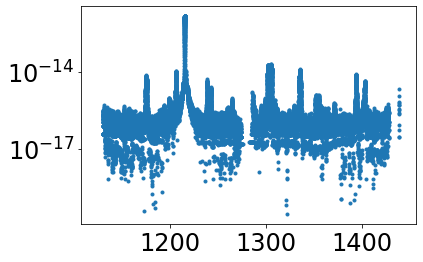

In [100]:
med1 = np.nanmean(flux1[element=='G130M'], axis=0)

plt.plot(wave1[which==1][0], med1,'.')
plt.yscale('log')
#plt.xlim(1236,1245)

In [90]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    1 / Number of standard extensions                  
DATE    = '2023-01-20'         / date this file was written (yyyy-mm-dd)        
FILENAME= 'split_lebw54gtq_83_x1d.fits' / name of file                          
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'COS   '             / identifier for instrument used to acquire data 
EQUINOX =               2000.0 / equinox of celestial coord. system             
                            

In [69]:
dates = Time(times, format='mjd')

In [75]:
dates.to_datetime()[100:]

array([datetime.datetime(2021, 12, 23, 12, 21, 26, 414496),
       datetime.datetime(2021, 12, 23, 12, 21, 41, 414496),
       datetime.datetime(2021, 12, 23, 12, 21, 56, 414496), ...,
       datetime.datetime(2022, 7, 26, 5, 16, 6, 816576),
       datetime.datetime(2022, 7, 26, 5, 16, 21, 816576),
       datetime.datetime(2022, 7, 26, 5, 16, 28, 408617)], dtype=object)

In [ ]:
med1 = np.nanmean(flux1[which==0], axis=0)

plt.plot(wave1[which==0][0], med1,'.')
plt.yscale('log')

KeyboardInterrupt: 

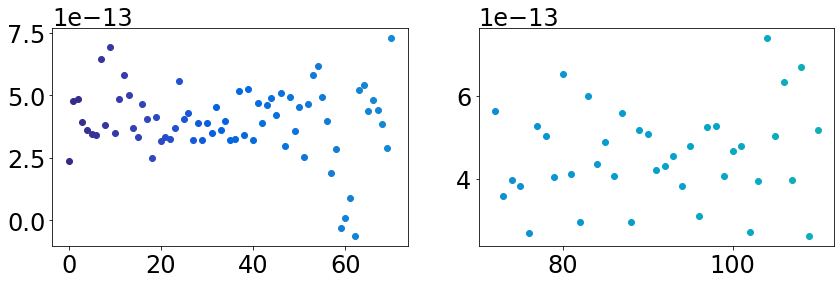

In [66]:
q1 = (which==1) 
q2 = (wave1[q1][0] >= 1236) & (wave1[q1][0] <= 1245)

lc = np.nansum(flux1[q1][:,q2], axis=1)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
for i in range(71):
    ax1.plot(i, np.nansum(flux1[q1][:,q2][i]), 'o', c=parula[i])
for i in range(72, 154):
    ax2.plot(i, np.nansum(flux1[q1][:,q2][i]), 'o', c=parula[i])